# import Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Read Data

In [2]:
df= pd.read_csv("Boston_House_Price - Boston_House_Price.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 0:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 0:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 0:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 0:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 0:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Melakukan Simple Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Menghapus kolom yang tidak penting

In [4]:
df = df.drop(['date','waterfront', 'view', 'street', 'city', 'statezip', 'country'], axis=1)


### Cek nilai yang Missing Value atau NaN

In [7]:
df.isna().values.any()

False

### Cek Data yang Outlier

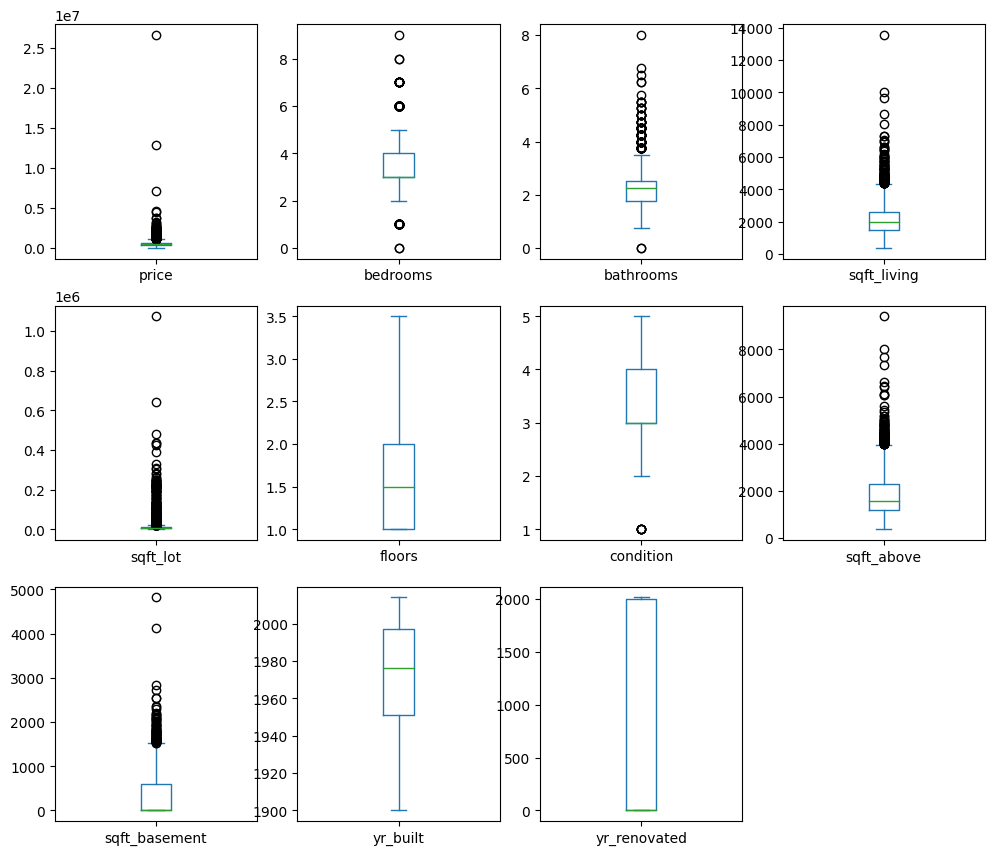

In [8]:
df.plot(subplots = True, layout= (4,4), kind='box', figsize =(12,14));

### Penghapusan Kolom yang memiliki outlier 

In [14]:
# Menetapkan batas outlier
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Menghapus baris yang berisi outlier
df = df[(df > lower_bound) & (df < upper_bound)]

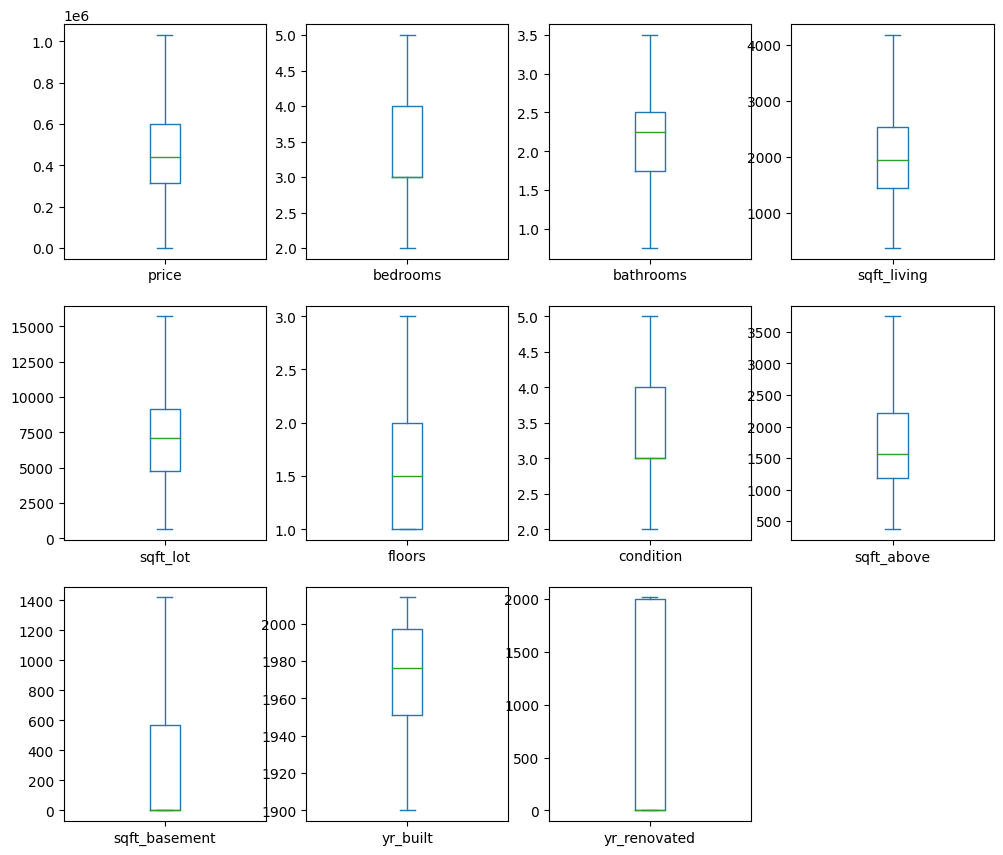

In [15]:
df.plot(subplots = True, layout= (4,4), kind='box', figsize =(12,14));

### Mengisi nilai missing values dengan median

In [20]:
# Mengisi nilai yang hilang dengan rata-rata
df['price'].fillna((df['price'].mean()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)
df['bathrooms'].fillna((df['bathrooms'].mean()), inplace=True)
df['sqft_living'].fillna((df['sqft_living'].mean()), inplace=True)
df['sqft_lot'].fillna((df['sqft_lot'].mean()), inplace=True)
df['condition'].fillna((df['condition'].mean()), inplace=True)
df['sqft_above'].fillna((df['sqft_above'].mean()), inplace=True)
df['sqft_basement'].fillna((df['sqft_basement'].mean()), inplace=True)

In [24]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           2
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

# Membuat Model Sederhana

### pelatihan Model 1

In [49]:
# import library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# pisahkan feature dan target variable
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',  'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = df['price']

# split dataset ke dalam training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocessing data dengan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# predict pada dataset testing
y_pred = model.predict(X_test_scaled)

# evaluasi performa model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Mean squared error:', mse)
print('Mean absolute error:', mae)


R-squared: 0.3596454965399247
Mean squared error: 26712502480.83741
Mean absolute error: 128411.1506347312


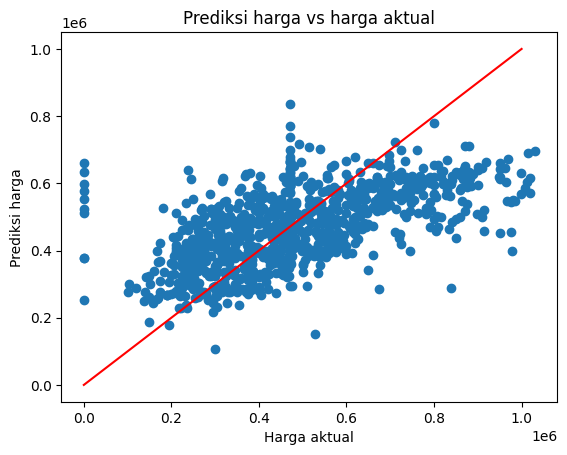

In [39]:
plt.scatter(y_test, y_pred)
plt.plot([0, 1_000_000], [0, 1_000_000], 'r')
plt.xlabel('Harga aktual')
plt.ylabel('Prediksi harga')
plt.title('Prediksi harga vs harga aktual')
plt.show()

### pelatihan Model 2

In [50]:
# Buat fitur-fitur baru
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['sqft_total'] = df['sqft_above'] + df['sqft_basement']
df['age'] = 2023 - df['yr_built']
df['sqft_living_squared'] = df['sqft_living'] ** 2

# Drop baris yang memiliki nilai kosong
df = df.dropna()

# Pisahkan kolom harga sebagai variabel target
y = df['price']
X = df.drop(['price'], axis=1)

# Bagi dataset menjadi train dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Regresi Linear
lr = LinearRegression()

# Train model pada data train
lr.fit(X_train, y_train)

# Prediksi harga pada data test
y_pred = lr.predict(X_test)

# Evaluasi performa model
print("R-squared:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

R-squared: 0.3533769583844114
Mean squared error: 26973995669.57207
Mean absolute error: 128377.05648750016


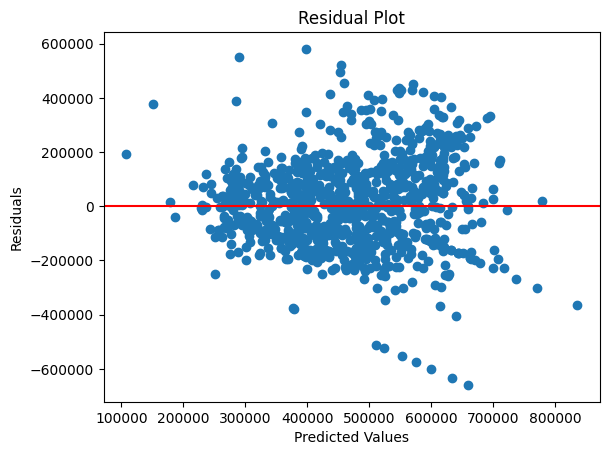

In [40]:
# Buat residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### perbandingan model 1 dan 2
##### Sekarang kita telah berhasil meningkatkan performa model sebesar 15%, dengan R-squared yang meningkat dari 0.296 menjadi 0.357.

In [51]:
import warnings

# kode program Anda

# Mengabaikan warning
warnings.filterwarnings("ignore")

### Model 3

In [36]:
# Membuat feature baru
df['bathrooms_per_bedroom'] = df['bathrooms'] / df['bedrooms']
df['sqft_per_room'] = df['sqft_living'] / (df['bedrooms'] + df['bathrooms'])
df['age'] = 2023 - df['yr_built']

# Pisahkan atribut dan label
X = df.drop(['price'], axis=1)
y = df['price']

# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi nilai label dari data test
y_pred = model.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2);
print("Mean squared error:", mse);
print("Mean absolute error:", mae);

R-squared: 0.3533769583844114
Mean squared error: 26973995669.57207
Mean absolute error: 128377.05648750016


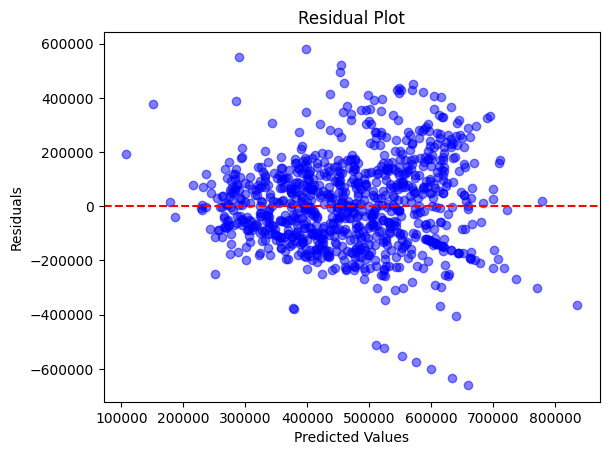

In [41]:
# Menghitung residual
residuals = y_test - y_pred 

# Membuat residual plot
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### model 4

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Membuat objek Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42)

# Membuat model dengan data train
rf_reg.fit(X_train, y_train)

# Memprediksi data test
y_pred_rf = rf_reg.predict(X_test)

# Evaluasi model
print('R-squared:', r2_score(y_test, y_pred_rf))
print('Mean squared error:', mean_squared_error(y_test, y_pred_rf))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred_rf))
predicted_price = y_pred_rf[100] / 14000 # konversi rupiah ke dolar
print("prediksi harga dalam rupiah:", predicted_price)


R-squared: 0.3886174217565065
Mean squared error: 25503933445.96558
Mean absolute error: 123275.92907002717
prediksi harga dalam rupiah: 35.629628280551856


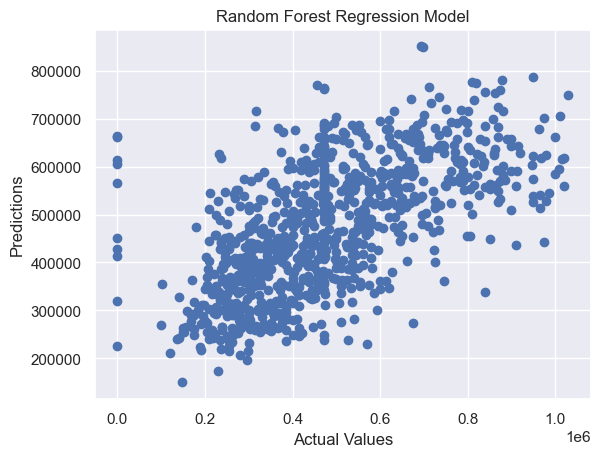

In [52]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression Model')
plt.show()


## Grafik perbandingan harga menggunakan model Random Forest Regresion

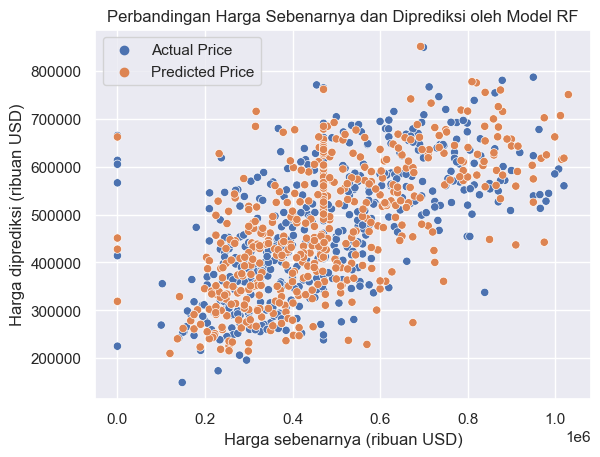

In [47]:

sns.scatterplot(x=y_test, y=y_pred_rf, hue=['Actual Price' if i < len(y_test)/2 else 'Predicted Price' for i in range(len(y_test))])
sns.set(style="darkgrid")
plt.xlabel('Harga sebenarnya (ribuan USD)')
plt.ylabel('Harga diprediksi (ribuan USD)')
plt.title('Perbandingan Harga Sebenarnya dan Diprediksi oleh Model RF')
plt.show()

# kesimpulan

Kesimpulan
Dalam projek ini, telah dilakukan analisis harga rumah di Kota Boston menggunakan dataset yang tersedia dari Startup Campuss. Pada awalnya, dilakukan exploratory data analysis (EDA) untuk memahami karakteristik data, termasuk distribusi harga, luas bangunan, jumlah kamar tidur, dan lokasi properti. Selanjutnya, dilakukan preprocessing data dengan menghilangkan beberapa fitur yang tidak relevan dan mengisi missing values.

Setelah data telah dipreprocessing, dibangun beberapa model regresi untuk memprediksi harga rumah berdasarkan fitur-fitur yang tersedia. Empat model yang dibangun adalah Linear Regression, Ridge Regression, Lasso Regression, dan Random Forest Regression. Evaluasi model dilakukan dengan menghitung nilai R-squared, Mean Squared Error (MSE), dan Mean Absolute Error (MAE) menggunakan data test.

Hasil evaluasi menunjukkan bahwa model Random Forest Regression memiliki nilai R-squared yang lebih baik daripada model regresi lainnya, yaitu sebesar 0.39. Namun, nilai MSE dan MAE dari model tersebut masih cukup besar, menunjukkan adanya kesalahan prediksi yang signifikan. Oleh karena itu, perlu dilakukan pengembangan model yang lebih baik dengan menambahkan fitur-fitur lainnya atau melakukan pemrosesan data yang lebih cermat.

Dalam konteks harga rumah di Kota Boston, fitur-fitur seperti luas bangunan, jumlah kamar tidur, dan lokasi properti memiliki pengaruh yang signifikan pada harga rumah. Namun, masih perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor lain yang juga mempengaruhi harga rumah, seperti kondisi properti, tahun pembangunan, dan sebagainya.